In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('Flight_Fare.csv')

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Basic Steps

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df['Airline'].describe

<bound method NDFrame.describe of 0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10683, dtype: object>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [14]:
# handling or removing null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [16]:
df['Route'].mode()[0]

'DEL → BOM → COK'

In [18]:
df['Route'].fillna(df['Route'].mode()[0],inplace=True)

In [20]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## DATE & TIME PROCESSING 
### Convert 'Date_of_Journey' to datetime and extract day/month


In [25]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y').dt.month
df.drop(['Date_of_Journey'], axis=1, inplace=True)

In [27]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [29]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'], axis=1, inplace=True)

In [31]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [33]:
# Convert 'Arrival_Time' to hour and minute
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'], axis=1, inplace=True)

In [35]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [37]:
df.drop(['Additional_Info'],axis=1 ,inplace=True)

In [39]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,12648,1,3,11,30,14,10


In [41]:
# Convert 'Duration' to total minutes
def convert_duration(duration):
    if 'h' not in duration:
        duration = '0h ' + duration
    if 'm' not in duration:
        duration = duration + ' 0m'
    h, m = duration.split('h')
    m = m.strip().replace('m', '')
    return int(h.strip()) * 60 + int(m)

df['Duration_mins'] = df['Duration'].apply(convert_duration)
df.drop(['Duration'], axis=1, inplace=True)

In [43]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,13302,1,3,16,50,21,35,285


 # OR this code

In [46]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [48]:
# Convert 'Total_Stops' to numeric
stops_map = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
df['Total_Stops'] = df['Total_Stops'].map(stops_map)


In [50]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,285


In [52]:
df.drop(['Route'],axis=1,inplace=True)

# ONE - HOT - ENCODING

In [55]:
df_encoded = pd.get_dummies(df,columns=['Airline','Source','Destination'] , drop_first = True)

In [57]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Journey_day                                10683 non-null  int32
 3   Journey_month                              10683 non-null  int32
 4   Dep_hour                                   10683 non-null  int32
 5   Dep_min                                    10683 non-null  int32
 6   Arrival_hour                               10683 non-null  int32
 7   Arrival_min                                10683 non-null  int32
 8   Duration_mins                              10683 non-null  int64
 9   Airline_Air India                          10683 non-null  bool 
 10  Airline_GoAir                              106

# Exploratory Data Analysis (EDA)

In [60]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

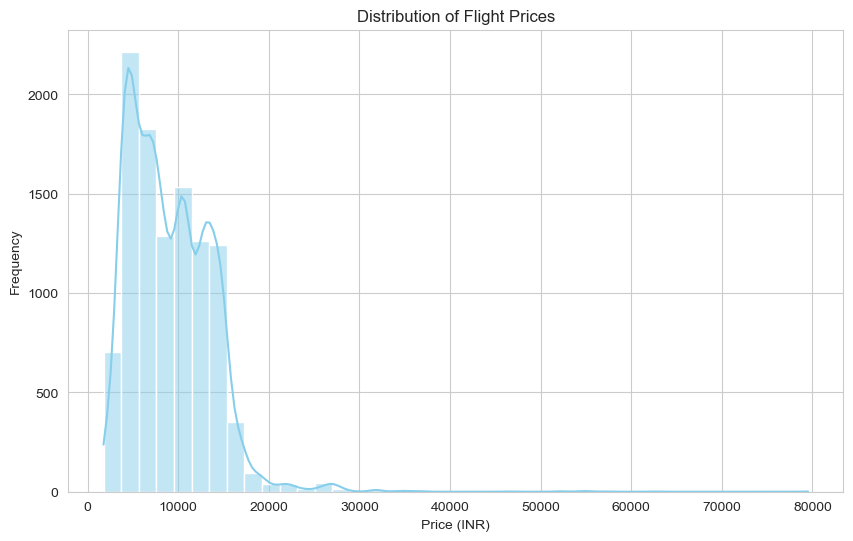

In [62]:
 #  1.Distribution of Flight Prices
plt.figure()
sns.histplot(df['Price'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()


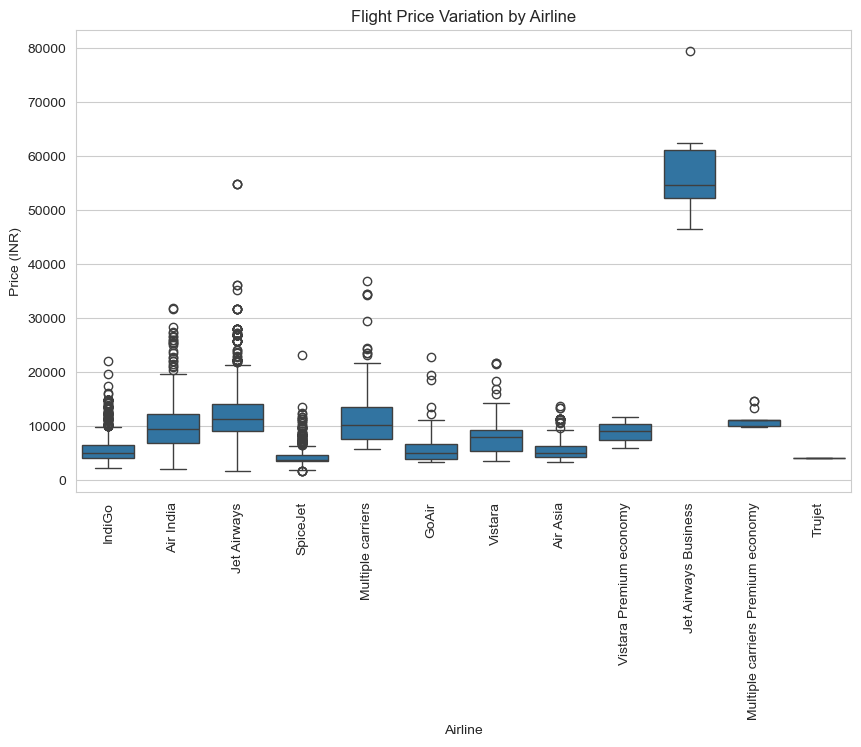

In [64]:
# 2. Price vs Airline (Boxplot)
plt.figure()
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Price Variation by Airline')
plt.xticks(rotation=90)
plt.ylabel('Price (INR)')
plt.show()


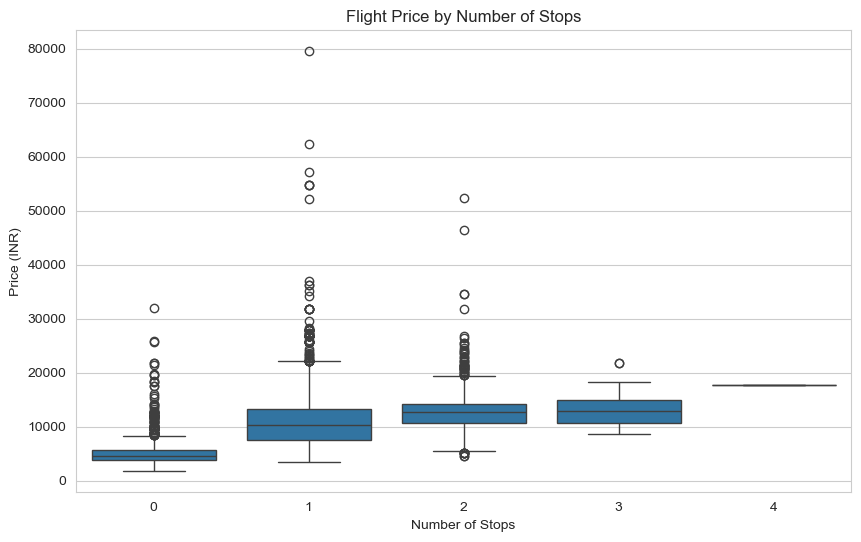

In [66]:
# 3. Price vs Total Stops
plt.figure()
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Price (INR)')
plt.show()

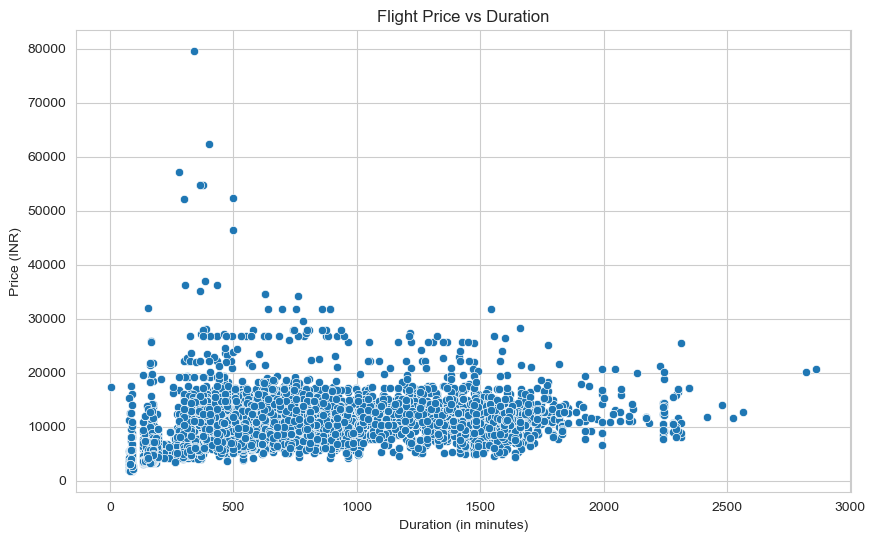

In [68]:
# 4. Price vs Duration (Scatter Plot)
plt.figure()
sns.scatterplot(x='Duration_mins', y='Price', data=df)
plt.title('Flight Price vs Duration')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Price (INR)')
plt.show()

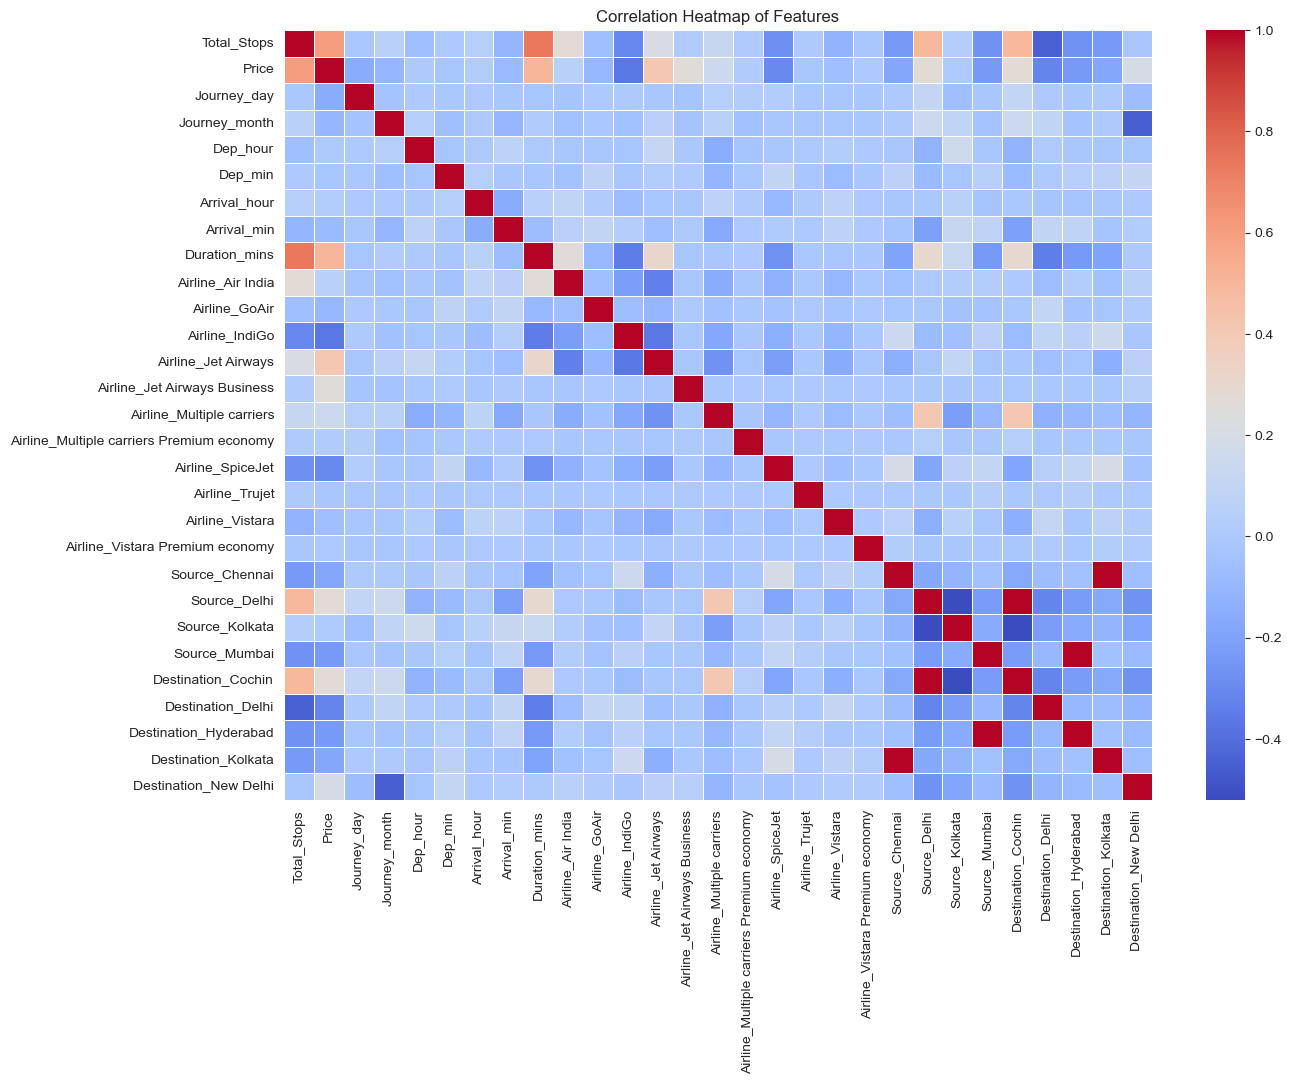

In [70]:
# 5. Correlation Heatmap (using the encoded DataFrame)
plt.figure(figsize=(14, 10))
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Insights from EDA and Feature Engineering

1. Flight Price Distribution : 
            Right-skewed distribution with most flights priced between ₹3,000–₹15,000.

2. Price vs Airline :
        Jet Airways (Business) and Multiple Carriers (Premium) have the highest prices.
        --> IndiGo and Air India offer mid-range fares.

3. Price vs Total Stops :
                 Prices increase with the number of stops; non-stop flights are cheapest on average.

4.Price vs Duration:
                    A positive trend: longer durations tend to cost more, though with some variability.

5. Correlation Heatmap :
                  Duration_mins, Total_Stops, and encoded airline features have moderate correlation with Price.



In [126]:
try:
    from xgboost import XGBRegressor
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost not installed. Skipping XGBoost model.")


In [78]:
# Target split
x = df_encoded.drop(['Price'],axis = 1)
y = df_encoded['Price']

In [82]:
# Train / Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [128]:
# model training
models = {
    'Linear Regression' : LinearRegression(),
    'Random Forest'  : RandomForestRegressor(random_state=42)    
}

if xgb_available:
    models["XGBoost"] = XGBRegressor(random_state=42, verbosity=0)

results = []

In [130]:
# Evaluating model 
for name,model in models.items():
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    r2 = r2_score(y_test,preds)
    results.append({
          'Model' : name,
        'R2 Score' : round(r2,4)
    })

In [131]:
# Results as DataFrames
results_df = pd.DataFrame(results)
print(results_df[['Model','R2 Score']].sort_values('R2 Score', ascending = False))

               Model  R2 Score
2            XGBoost    0.8459
1      Random Forest    0.8076
0  Linear Regression    0.6150
